Using Decision Trees and Ensemble Models in classification and regression 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In [14]:
#required imports
import numpy as np
import pandas as pd

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [15]:
#loading the data
df = pd.read_excel("default of credit card clients.xls", skiprows= 1, header = 0)

In [16]:
df.drop('ID', axis=1, inplace=True)
df.rename(columns = {'default_payment_next_month':'target'}, inplace=True);

In the following, you can take a look into the dataset.

In [17]:
df.head(10)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   
5      50000    1          1         2   37      0      0      0      0   
6     500000    1          1         2   29      0      0      0      0   
7     100000    2          2         2   23      0     -1     -1      0   
8     140000    2          3         1   28      0      0      2      0   
9      20000    1          3         2   35     -2     -2     -2     -2   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   
5      0  ...      19394      19619      20024      2500      1815       657   
6      0  ...     542653     483003     473944     55000     40000     38000   
7      0  ...        221       -159        567       380       601         0   
8      0  ...      12211      11793       3719      3329         0       432   
9     -1  ...          0      13007      13912         0         0         0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  target  
0         0         0         0       1  
1      1000         0      2000       1  
2      1000      1000      5000       0  
3      1100      1069      1000       0  
4      9000       689       679       0  
5      1000      1000       800       0  
6     20239     13750     13770       0  
7       581      1687      1542       0  
8      1000      1000      1000       0  
9     13007      1122         0       0  

[10 rows x 24 columns]

In [18]:
df.shape

(30000, 24)


Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [19]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer


from IPython.display import SVG
from graphviz import Source
from sklearn import tree

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import time

In [20]:
dep_var = ['target']

categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']

discrete_vars = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Decision Trees - One Hot Encoding and Min Max Scaling - Is it necessary?

"TLDR
One-hot encoding categorical variables with high cardinality can cause inefficiency in tree-based ensembles. Continuous variables will be given more importance than the dummy variables by the algorithm which will obscure the order of feature importance resulting in poorer performance."

https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

"For 1, decision trees in in general don't usually require scaling. However, it helps with data visualization/manipulation, and might be useful if you intend to to compare performance with other data or other methods like SVM."

https://stats.stackexchange.com/questions/72231/decision-trees-variable-feature-scaling-and-variable-feature-normalization

I attempted to run two models: one where the features were not one-hot-encoded and scaled, and one where they were. The untouched model yielded a test accuracy slightly better (72.37% vs 72.07%). For this reason and for better interpretiability of the model, I am keeping the untouched model. The code for the other model is in the Appendix.

In [21]:
X = df[categorical_vars + discrete_vars]
y = df[['target']].values

In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

test accuracy for Random Forest Classifier: 72.37 %


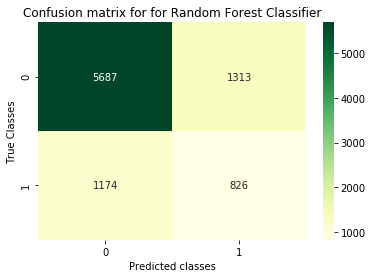

In [25]:
y_hat = clf.predict(X_test)

print('test accuracy for Random Forest Classifier:'\
      , round(metrics.accuracy_score(y_test, y_hat)*100, 2), '%')
plt.title('Confusion matrix for for Random Forest Classifier')
sns.heatmap(metrics.confusion_matrix(y_test, y_hat), annot=True, cmap="YlGn",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

In [26]:
graph = Source(tree.export_graphviz(clf, out_file=None,feature_names=categorical_vars + discrete_vars,
        class_names=["No","Yes"], filled = True))
display(SVG(graph.pipe(format='svg')))

### Try different hyper-parameters (at least two) and discuss the result.

Hyperparameters
* criterion
* depth


In [27]:
# Create lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = range(2,20,2)

In [28]:
# Create a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
param_grid = dict(criterion=criterion, max_depth=max_depth)

In [29]:
param_grid

{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 20, 2)}

In [30]:
# Conduct Parameter Optmization With Pipeline
# Create a grid search object

grid_search = GridSearchCV(estimator=clf, 
                               param_grid=param_grid,
                               scoring='accuracy',
                               cv=5)
time_start = time.time()
grid_search.fit(X=X_train, y=np.ravel(y_train))
print('Time elapsed: {} seconds'.format(time.time()-time_start))

# View The Best Parameters
print("{} accuracy score: {}%".format(grid_search.__class__.__name__, round(grid_search.best_score_*100, 3)))
print("{} best parameters: {}".format(grid_search.__class__.__name__, grid_search.best_params_))
print("\n",grid_search.best_estimator_)
print("\n")

Time elapsed: 20.98508596420288 seconds
GridSearchCV accuracy score: 82.167%
GridSearchCV best parameters: {'criterion': 'entropy', 'max_depth': 4}

 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')




#### Question 2 (4 pts)

Try to build the decision tree which you built for the previous question, but this time by RandomGrid search over hyper-parameters. Compare the results.

In [31]:
# YOUR CODE HERE

n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_grid,
                                   n_iter=n_iter_search, cv=5, iid=False)

time_start = time.time()
random_search.fit(X=X_train, y=np.ravel(y_train))
print('Time elapsed: {} seconds'.format(time.time()-time_start))

# View The Best Parameters
print("{} accuracy score: {}%".format(random_search.__class__.__name__, round(random_search.best_score_*100, 3)))
print("{} best parameters: {}".format(random_search.__class__.__name__, random_search.best_params_))
print("\n",random_search.best_estimator_)
print("\n")

Time elapsed: 9.601091384887695 seconds
RandomizedSearchCV accuracy score: 82.167%
RandomizedSearchCV best parameters: {'max_depth': 4, 'criterion': 'entropy'}

 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')




We can see that the Randomized Search ran in about half the time. By chance, it was able to produce the same result.

#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 

"In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain the better predictive performance than could be obtained from any of the constituent learning algorithms alone."

AdaBoost (Adaptive Boosting) is built from a sequence of weak learners in which each one is tweaked in a favor of those instances which are misclassified by the previous classifier. 



In [32]:
# Step 3: Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7231111111111111

In [33]:
# Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by 5%
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\jdonv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8172222222222222

In [34]:
# Step 5: Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\jdonv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.815

In [35]:
# Step 6: Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\jdonv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.819

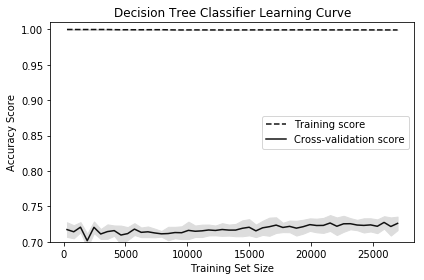

In [36]:
from sklearn.model_selection import learning_curve

# Code leveraged from two sources:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
# https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
    # Create plot
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='accuracy', n_jobs=n_jobs, train_sizes=train_sizes)

    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.tight_layout()
    plt.legend(loc="best")
    
    return plt
    


title = "Decision Tree Classifier Learning Curve"


estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=10, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))


plt.show()

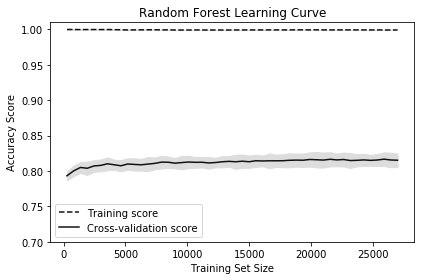

In [37]:
title = "Random Forest Learning Curve"


estimator = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=10, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))


plt.show()

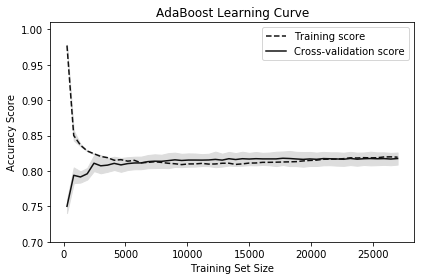

In [38]:
title = "AdaBoost Learning Curve"


estimator = AdaBoostClassifier(n_estimators=100)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=10, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))


plt.show()


Discuss and compare the results 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

## Answer

Overall we see below results:

| Classifier                 | Test Accuracy |
|----------------------------|---------------|
| Default Decision Tree      | 72.37%        |
| GridSearch Decision Tree   | 82.17%        |
| RandomSearch Decision Tree | 82.17%        |
| Random Forest              | 81.72%        |
| Ada Boost                  | 81.50%        |
| Gradient Boost             | 81.90%        |


GridSearch and RandomSearch allowed the hyperparameters to be changed, evaluated, and the best model was selected. Since there were hyperparameters that produced better results than the default hyperparameters, the test accuracy improved.

Overall, each of the ensemble methods produced higher test accuracy.

Random Forest works well because it consists of numerous Decision Trees operating as an ensemble, and therefore, outperforms a single Decision Tree.

The Boosting methods are similar in that they work based on an ensemble of predictors, each correcting the errors of the others in the sequence. This leads to better performance of the model.

We can see that these optimizations take more computation to perform and therefore, on larger datasets may require solutions that address this.

## References

Decision Tree Classifier: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
Grid Search Examples:
https://www.kaggle.com/shotashimizu/09-decisiontree-gridsearchcv
https://www.dezyre.com/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python

RFC, Boosting:
https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

Learning Curves:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/

## Appendix

In [ ]:
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_pipe = Pipeline(steps=[cat_ohe_step])
cat_transformers = [('cat', cat_pipe, categorical_vars)]

num_scl_step = ('scl', MinMaxScaler())
num_pipe = Pipeline(steps=[num_scl_step])
num_transformers = [('num', num_pipe, discrete_vars)]

ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_vars + discrete_vars])
X = ct.transform(df[categorical_vars + discrete_vars])
y = df[['target']].values

feature_names = ['SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'] + discrete_vars

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

y_hat = clf.predict(X_test)

print('test accuracy for Random Forest Classifier:'\
      , round(metrics.accuracy_score(y_test, y_hat)*100, 2), '%')
plt.title('Confusion matrix for for Random Forest Classifier')
sns.heatmap(metrics.confusion_matrix(y_test, y_hat), annot=True, cmap="YlGn",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()